In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download "jangedoo/utkface-new"

!unzip utkface-new.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104

In [2]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 47.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=11c107a95a05ed9290d64947d8f5eeaf384fa8e19eb5c9216cc89430f3ffc890
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

In [3]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis


In [4]:
# [100]_[1_0]_[20170110183726390]
#[age] [men_women]

import re
# get age index, gender, date time
pattern = r'(\d+)_(\d+)_(\d+)_(\d+).jpg'

p= re.compile(pattern)

r= p.search('100_1_0_20170110183726390.jpg.chip.jpg')
#EXAMPLE get data of p
# print(r)

print(r.group(1)) #get age


100


In [5]:
DATADIR='/content/UTKFace'

In [6]:
#trả về 3 đối tượng, lấy hình ảnh từ DATADIR,
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern,
                      is_regression = True,
                      random_state=42)

 # Kiểm tra kích thước của tập dữ liệu huấn luyện và kiểm tra
print(f'Train data size: {len(train_data)}')
print(f'Test data size: {len(test_data)}')

/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/UTKFace/61_1_20170109150557335.jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/UTKFace/24_0_1_20170116220224657 .jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/UTKFace/61_1_20170109142408075.jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/UTKFace/39_1_20170116174525125.jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:877: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn(
/usr/local/lib/python3.10/

['label']
       label
10325   38.0
776     75.0
10087   55.0
3045     6.0
21954   15.0
['label']
       label
17813   27.0
15079   26.0
22828   55.0
16073   42.0
8972    80.0
Found 21333 validated image filenames.
Found 2371 validated image filenames.
Train data size: 667
Test data size: 75


In [7]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [8]:
# khởi tạo mô hình RESNET50

model = vis.image_regression_model('pretrained_resnet50',
                                   train_data=train_data,
                                   val_data= test_data
                                   )

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94765736/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [9]:
# khởi tạo learner =>> manage and rate the model
learner = ktrain.get_learner(model=model,
                            train_data=train_data,
                            val_data=test_data,
                            batch_size =64)

In [10]:
#learning rate = 1e-4

In [11]:
learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
334/334 [==============================] - 93s 251ms/step - loss: 371.5193 - mae: 14.1500 - val_loss: 160.4624 - val_mae: 9.6820
Epoch 2/2
334/334 [==============================] - 80s 238ms/step - loss: 137.3644 - mae: 8.9597 - val_loss: 128.9161 - val_mae: 8.6576


In [12]:
#bỏ qua 15 class đầu tiên, và chỉ chấp nhận sau khi train
learner.freeze(15)

learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
334/334 [==============================] - 235s 670ms/step - loss: 104.8097 - mae: 7.6028 - val_loss: 104.1019 - val_mae: 7.2786
Epoch 2/2
334/334 [==============================] - 221s 660ms/step - loss: 44.0021 - mae: 4.9814 - val_loss: 58.1732 - val_mae: 5.6002


In [13]:
predictor = ktrain.get_predictor(learner.model, preproc)


In [14]:
test_data.filenames[10:20]

['22_1_3_20170104223113527.jpg.chip.jpg',
 '24_1_4_20170116214244943.jpg.chip.jpg',
 '27_0_0_20170117195011835.jpg.chip.jpg',
 '5_1_0_20170109192118486.jpg.chip.jpg',
 '30_0_0_20170117143424561.jpg.chip.jpg',
 '26_1_3_20170119193105762.jpg.chip.jpg',
 '25_0_0_20170117192134028.jpg.chip.jpg',
 '27_0_1_20170116193152719.jpg.chip.jpg',
 '21_1_0_20170104234439209.jpg.chip.jpg',
 '67_0_0_20170105172950852.jpg.chip.jpg']

In [15]:
def show_prediction(fname):
  #Dẫn đến file ảnh
  fname = DATADIR + '/' + fname
  #predict age
  pred = round(predictor.predict_filename(fname)[0])

  #actual age
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Predicted Age: %s  |  Actual Age: %s" % (pred, actual))

Predicted Age: 52  |  Actual Age: 67


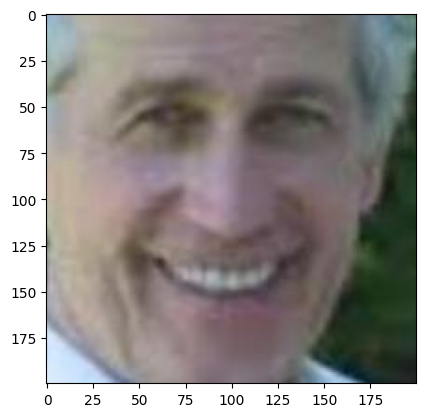

In [16]:
show_prediction ('67_0_0_20170105172950852.jpg.chip.jpg')

In [31]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [34]:
def real_prediction(fname):
  pred= round(predictor.predict_filename(filename)[0])
  vis.show_image(fname)
  print("Predicted Age: %s" % (pred))


In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, title):
    plt.figure(figsize=(12, 8))

    for name, history in histories:
        plt.plot(history.history['loss'], label=f'{name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))

    for name, history in histories:
        plt.plot(history.history['mae'], label=f'{name} Train MAE')
        plt.plot(history.history['val_mae'], label=f'{name} Validation MAE')

    plt.title('Model MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

histories = [
    ('ResNet-50', history_resnet),
    # ('CNN', history_cnn),
    # ('VGG16', history_vgg16)
]

plot_history(histories, 'Model Loss Comparison')
